# 4.3.6 [Challenge: Make Your Network](https://courses.thinkful.com/data-201v1/project/4.3.6)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline
import argparse
import time

# Set up dataset
ESS population dataset, predict if respondant lives with a partner

In [4]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# MLP Supervised Neural Net
### Selecting layer construction
Whether or not someone lives with a partner

In [5]:
y.value_counts()/len(y)

0.0    0.615319
1.0    0.384681
Name: partner, dtype: float64

In [7]:
# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
%time mlp.fit(X, y)

cv_score = cross_val_score(mlp, X, y, cv=5)
print("Cross Val Avg: %.3f"%cv_score.mean())
print("Cross Val Std: %.3f"%np.std(cv_score))

CPU times: user 4.74 s, sys: 515 ms, total: 5.25 s
Wall time: 3.19 s
Cross Val Avg: 0.730
Cross Val Std: 0.027


In [11]:
def mpl_test(layer_array, describe ):
    print("MPL Classifier {}:".format(describe))
    mlp = MLPClassifier(hidden_layer_sizes=layer_array,
                       activation = 'relu',
                       solver = 'adam',
                       learning_rate_init = 0.01)
    #%time mlp.fit(X, y)
    cross_val = cross_val_score(mlp, X, y, cv=5)
    print("\n5-fold Cross Val Scores: \
           \nCross Val Avg: %.3f  \
           \nCross Val Std: +/- %.3f"%(cross_val.mean(), np.std(cross_val)))

mpl_test((10,10,10,10,10), '5 layers of 10')

MPL Classifier 5 layers of 10:

5-fold Cross Val Scores:            
Cross Val Avg: 0.741             
Cross Val Std: +/- 0.013


In [12]:
mpl_test((100,100,100), '3 layers of 100')
# with fewer but larger layers deviation between folds 
# incresed without improving accuracy 

MPL Classifier 3 layers of 100:

5-fold Cross Val Scores:            
Cross Val Avg: 0.738             
Cross Val Std: +/- 0.021


In [13]:
mpl_test((1000), '1 large layer')
# 1 large layer performed exactly the same as 3 layers of 100 

MPL Classifier 1 large layer:

5-fold Cross Val Scores:            
Cross Val Avg: 0.734             
Cross Val Std: +/- 0.021


In [14]:
mpl_test((15,15,15,15,15,15), '6 layers of 15')


MPL Classifier 6 layers of 15:

5-fold Cross Val Scores:            
Cross Val Avg: 0.741             
Cross Val Std: +/- 0.021


## Exploring Additional Parameters
### Test Activation and Solver
The default came up as the most effective 'relu' & 'adam'

In [25]:
# test learning type
# Relu performed the best
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10))

parameters = {
    'activation':('relu', 'logistic')
}

grid_search = GridSearchCV(mlp, parameters, cv=5, refit=True)
grid_search.fit(X, y)


cross_val = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("\n5-fold Cross Val Scores: \
       \nCross Val Avg: %.3f  \
       \nCross Val Std: +/- %.3f"%(cross_val.mean(), np.std(cross_val)))

print('\nBest parameters: \n{}'.format(grid_search.best_params_))


5-fold Cross Val Scores:        
Cross Val Avg: 0.745         
Cross Val Std: +/- 0.018

Best parameters: 
{'activation': 'relu'}


In [26]:
# test learning type and solver together
# not sure why specifiying adam rather than just doing the default (it is the default) would come up with 
# a new standard deviation. must be a different layout of the cuts
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10))

parameters = {
    'activation':('relu', 'logistic',),
    'solver': ('sgd', 'adam',)
}

grid_search = GridSearchCV(mlp, parameters, cv=5, refit=True)
grid_search.fit(X, y)


cross_val = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("\n5-fold Cross Val Scores: \
       \nCross Val Avg: %.3f  \
       \nCross Val Std: +/- %.3f"%(cross_val.mean(), np.std(cross_val)))

print('\nBest parameters: \n{}'.format(grid_search.best_params_))


5-fold Cross Val Scores:        
Cross Val Avg: 0.742         
Cross Val Std: +/- 0.010

Best parameters: 
{'activation': 'relu', 'solver': 'adam'}


## Checking out Alpha & Learning Rate
Alpha pendalty doesn't seem to be that important here.
Since there is not a huge number of features


In [22]:
# test learning alpha
# This model did better when I wasn't playing with Alpha
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10))

parameters = {
    'activation':('relu',),
    'solver': ('adam',),
    'alpha': (.0001, .01, .1, .02)
}

grid_search = GridSearchCV(mlp, parameters, cv=5, refit=True)
grid_search.fit(X, y)

cross_val = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("\n5-fold Cross Val Scores: \
       \nCross Val Avg: %.3f  \
       \nCross Val Std: +/- %.3f"%(cross_val.mean(), np.std(cross_val)))

print('\nBest parameters: \n{}'.format(grid_search.best_params_))


5-fold Cross Val Scores:        
Cross Val Avg: 0.739         
Cross Val Std: +/- 0.019

Best parameters: 
{'activation': 'relu', 'alpha': 0.02, 'solver': 'adam'}


# Gradient Boost Model Tuning

In [29]:
# test loss function - deviance is the only loss function that is actually running for this classifier
boost = GradientBoostingClassifier()

parameters = {
    'loss':('deviance',),
    'subsample': (0.5,),
    'n_estimators': (10, 50, 100,),
    'max_depth': (4,9,),
    #'learning_rate': (.02,)
}

grid_search = GridSearchCV(boost, parameters, cv=5, refit=True)
grid_search.fit(X, y)
cross_val = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("\n5-fold Cross Val Scores: \
       \nCross Val Avg: %.3f  \
       \nCross Val Std: +/- %.3f"%(cross_val.mean(), np.std(cross_val)))

print('\nBest parameters: \n{}'.format(grid_search.best_params_))


5-fold Cross Val Scores:        
Cross Val Avg: 0.749         
Cross Val Std: +/- 0.015

Best parameters: 
{'loss': 'deviance', 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.5}


In [30]:
# test learning alpha
boost = GradientBoostingClassifier()

parameters = {
     'loss':('deviance',),
    'subsample': (0.5,),
    'n_estimators': (50, ),
    'max_depth': (4,),
    'learning_rate': (.02,.001)
}

grid_search = GridSearchCV(boost, parameters, cv=5, refit=True)
grid_search.fit(X, y)
cross_val = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("\n5-fold Cross Val Scores: \
       \nCross Val Avg: %.3f  \
       \nCross Val Std: +/- %.3f"%(cross_val.mean(), np.std(cross_val)))

print('\nBest parameters: \n{}'.format(grid_search.best_params_))


5-fold Cross Val Scores:        
Cross Val Avg: 0.744         
Cross Val Std: +/- 0.014

Best parameters: 
{'learning_rate': 0.02, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.5}


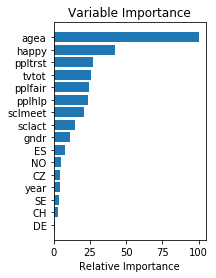

In [78]:
feature_importance = clf.feature_importances_

#  Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Started this challenge attempting to extract features on images. 

Found it to be quite a struggle without straight up copying every step from github so chose other challenge option. Saving the code from this experiment for another day

In [ ]:
import cv2, numpy as np, os

In [17]:
os.listdir('four-shapes/shapes/square')

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '1000.png',
 '1001.png',
 '1002.png',
 '1003.png',
 '1004.png',
 '1005.png',
 '1006.png',
 '1007.png',
 '1008.png',
 '1009.png',
 '101.png',
 '1010.png',
 '1011.png',
 '1012.png',
 '1013.png',
 '1014.png',
 '1015.png',
 '1016.png',
 '1017.png',
 '1018.png',
 '1019.png',
 '102.png',
 '1020.png',
 '1021.png',
 '1022.png',
 '1023.png',
 '1024.png',
 '1025.png',
 '1026.png',
 '1027.png',
 '1028.png',
 '1029.png',
 '103.png',
 '1030.png',
 '1031.png',
 '1032.png',
 '1033.png',
 '1034.png',
 '1035.png',
 '1036.png',
 '1037.png',
 '1038.png',
 '1039.png',
 '104.png',
 '1040.png',
 '1041.png',
 '1042.png',
 '1043.png',
 '1044.png',
 '1045.png',
 '1046.png',
 '1047.png',
 '1048.png',
 '1049.png',
 '105.png',
 '1050.png',
 '1051.png',
 '1052.png',
 '1053.png',
 '1054.png',
 '1055.png',
 '1056.png',
 '1057.png',
 '1058.png',
 '1059.png',
 '106.png',
 '1060.png',
 '1061.png',
 '1062.png',
 '1063.png',
 '1064.png',
 '1065.png',
 '1066.png',
 '1067.png',
 

In [23]:
#create lists to save the labels (the name of the shape)
PATH = 'four-shapes/shapes/'
shapes = ['square', 'circle', 'star', 'triangle']
img_size = 64
shapes = ['circle', 'square','triangle', 'star']
labels = []
dataset = []

#iterate through each shape
for shape in shapes:
    print('Getting data for: ', shape)
    #iterate through each file in the folder
    for img in os.listdir(os.path.join(PATH, shape)):
        image = cv2.imread(os.path.join(PATH,shape,img), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(img_size,img_size))
        dataset.append(image)
        #Add Label list
        labels.append(shapes.index(shape))
    
print('\nDataset Size :', len(dataset))
print('Image Shape :', dataset[0].shape)
print('Label size :', len(labels))


Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star

Dataset Size : 14970
Image Shape : (64, 64)
Label size : 14970


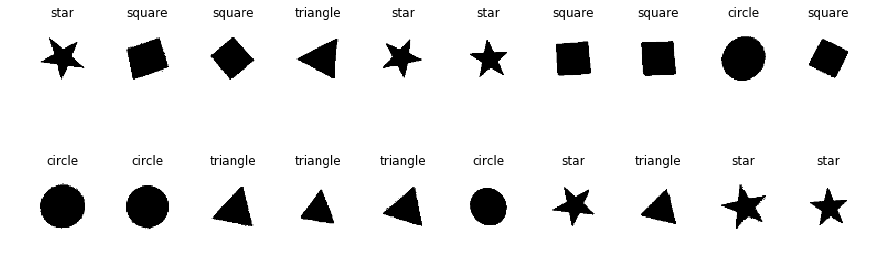

In [49]:
index = np.random.randint(0, len(dataset), size = 20)

plt.figure(figsize = (15, 5))

for i, ind in enumerate(index, 1):
    img = dataset[ind]
    lab = labels[ind]
    plt.subplot(2,10,i)
    plt.title(shapes[lab])
    plt.axis('off')

    plt.imshow(img, cmap = 'gray')

In [48]:
[[x,labels.count(x)] for x in set(labels)]

[[0, 3720], [1, 3765], [2, 3720], [3, 3765]]

In [40]:
np.unique(labels)

array([0, 1, 2, 3])

In [35]:
shapes

['circle', 'square', 'triangle', 'star']

In [52]:
dataset_np = np.array(dataset).reshape(-1,64,64,1)
dataset_np.shape

(14970, 64, 64, 1)

In [55]:
dataset_np = dataset_np.astype('float32')/255.0
dataset_np

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

In [56]:
x_train, x_test, y_train, y_test = train_test_split(dataset_np,
                                                   labels,
                                                   test_size=0.3,
                                                   random_state=42)

print('x_train size:', x_train.shape)
print('x_test size:', x_test.shape)

x_train size: (10479, 64, 64, 1)
x_test size: (4491, 64, 64, 1)
